<a href="https://colab.research.google.com/github/astrodatos/Clase4/blob/master/Actividad_4_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table

In [3]:
enlace = '/content/drive/My Drive/galaxies_sdss.fits'
dat = Table.read(enlace,format='fits')

df = dat.to_pandas()
print('All stars = ',len(df))

All stars =  500000


In [33]:
df_new = df[df['redshift'] > 0]
df_new = df_new.reset_index(drop=True)

In [34]:
#Calculo de distancias
#H0 = 74 (km/s)/Mpc Megamaser Cosmology Project
#d = cz/H0
c = 300000 #km/s
H0 = 74 #(km/s)/Mpc
df_new['distance'] = c*df_new['redshift']/H0 #Mpc

In [35]:
#definir magnitudes absolutas
df_new['Mu'] = df_new['u'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mg'] = df_new['g'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mr'] = df_new['r'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mi'] = df_new['i'] - 5*np.log10(df_new['distance']*1e6/10.)
df_new['Mz'] = df_new['z'] - 5*np.log10(df_new['distance']*1e6/10.)

df_new = df_new[df_new['Mr']>-23]
df_new = df_new[df_new['Mr']<-20]
df_new = df_new.reset_index(drop=True)

In [36]:
df_new

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,distance,Mu,Mg,Mr,Mi,Mz
0,1237674475439391293,174.434089,60.749397,25.493866,22.555429,20.862173,19.874660,19.400928,6752,301,6,34,8001846342434295808,b'GALAXY',0.509239,7107,56740,275,2064.483643,-16.080191,-19.018628,-20.711884,-21.699397,-22.173129
1,1237674475439653429,175.581724,60.899055,25.653475,22.334442,20.638035,19.722954,19.290579,6752,301,6,38,8001809508794765312,b'GALAXY',0.475017,7107,56740,141,1925.743042,-15.769517,-19.088550,-20.784957,-21.700038,-22.132413
2,1237679321791922196,44.933300,-5.024871,23.287470,21.433390,21.147358,20.757090,21.036522,7881,301,1,321,7944615659962241024,b'QSO',1.636030,7056,56577,967,6632.554199,-20.820934,-22.675014,-22.961046,-23.351314,-23.071882
3,1237661970118476705,200.266640,6.160458,22.681828,22.567169,21.054277,19.969360,19.382036,3841,301,1,236,5449366364819951616,b'GALAXY',0.574864,4840,55690,39,2330.530518,-19.155446,-19.270105,-20.782997,-21.867914,-22.455238
4,1237655106763948418,170.231015,58.003386,22.441759,22.199524,20.495407,19.407616,18.899120,2243,301,1,285,7994089286155505664,b'GALAXY',0.583706,7100,56636,727,2366.375000,-19.428659,-19.670894,-21.375011,-22.462802,-22.971298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320815,1237669767085293935,11.501684,7.564743,25.961109,21.712229,19.955654,19.057663,18.639196,5656,301,4,92,5115045014309572608,b'GALAXY',0.479855,4543,55888,297,1945.359131,-15.483890,-19.732770,-21.489345,-22.387336,-22.805803
320816,1237651735765385677,199.185986,1.914748,22.566666,22.005035,22.104755,22.001423,21.446743,1458,301,2,497,4510492555154952192,b'QSO',1.039832,4006,55328,500,4215.533691,-20.557597,-21.119227,-21.019507,-21.122840,-21.677520
320817,1237662193983750296,167.189011,40.527637,21.069960,20.260805,20.077553,19.774315,19.647661,3893,301,2,85,5201739028299124736,b'QSO',0.634222,4620,55652,296,2571.170654,-20.980695,-21.789849,-21.973102,-22.276340,-22.402993
320818,1237650369936556831,160.599336,-2.746469,25.802046,22.489908,20.335443,19.434641,18.977377,1140,301,2,51,4245793380728967168,b'GALAXY',0.515428,3771,55544,90,2089.574463,-15.798243,-19.110381,-21.264846,-22.165648,-22.622912


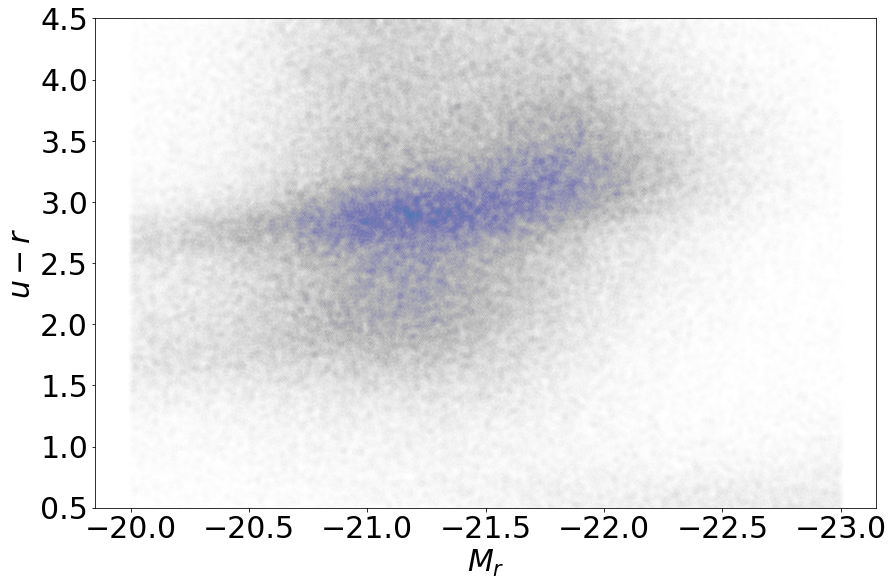

In [48]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df_new['Mr'],df_new['u']-df_new['r'],alpha=0.005)
plt.xlabel('$M_{r}$')
plt.ylabel('$u-r$')
plt.gca().set_ylim([0.5,4.5])
plt.gca().invert_xaxis()
plt.show()
plt.close()

Text(0.5, 0, '$M_z$')

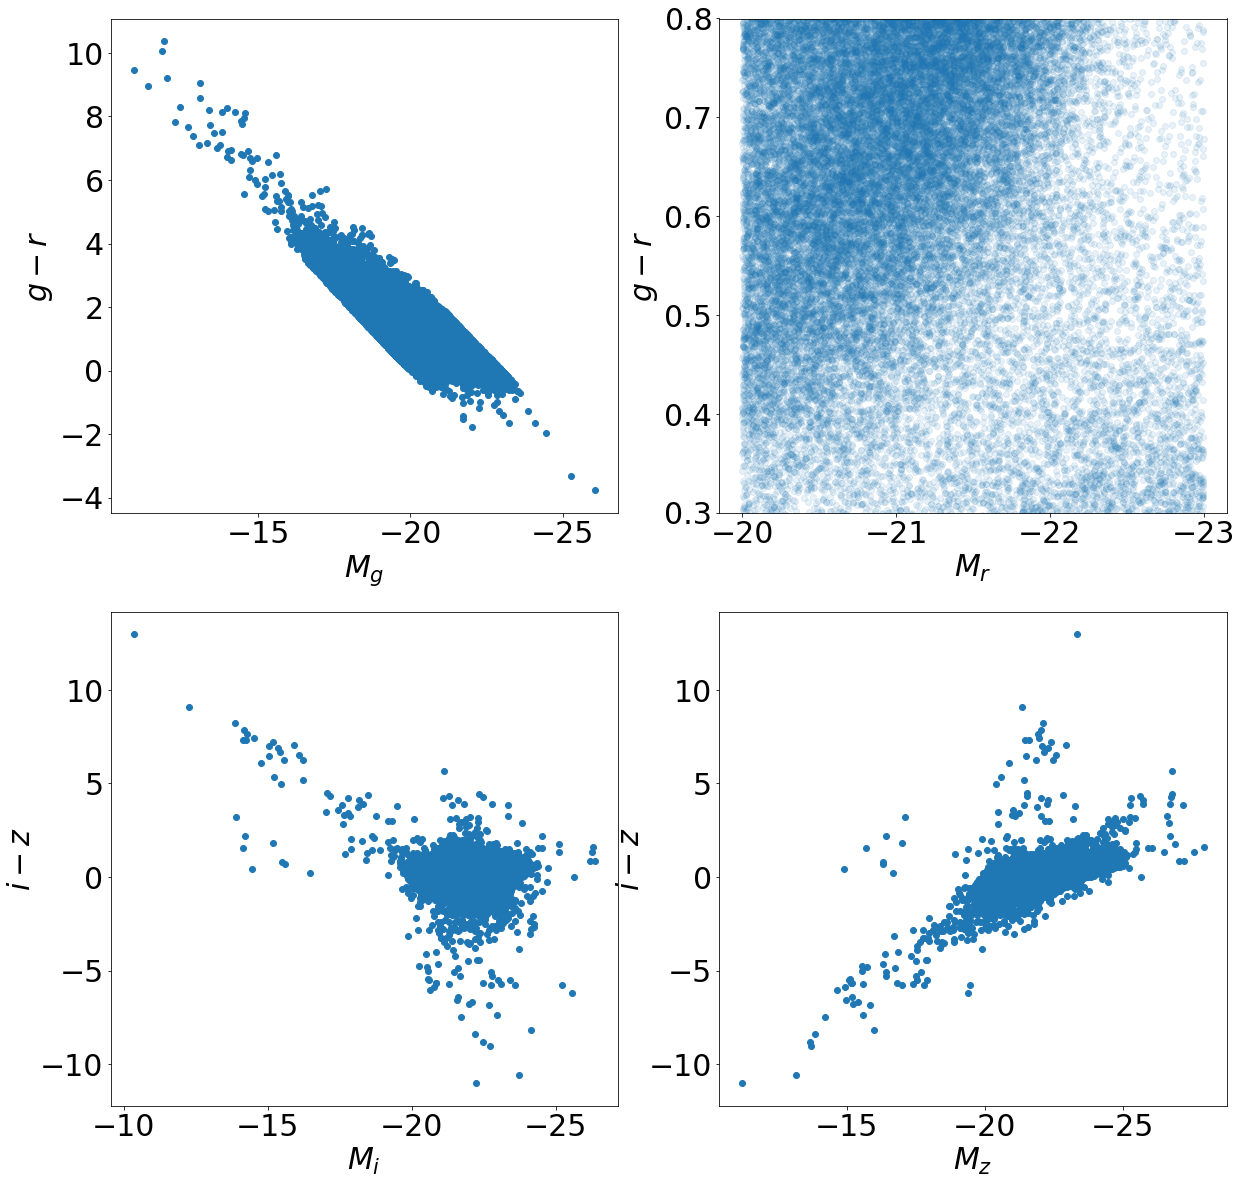

In [40]:

fig, ax = plt.subplots(figsize = (20,20), nrows = 2, ncols=2)

ax[0][0].scatter(df_new['Mg'],df_new['g']-df_new['r'])#, label = 'Cefeidas Tipo I', c = a_cep, alpha = 0.5)
ax[0][0].invert_xaxis()
ax[0][0].set_ylabel('$g-r$')
ax[0][0].set_xlabel(r'$M_g$')

ax[0][1].scatter(df_new['Mr'],df_new['g']-df_new['r'],alpha=0.1)#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[0][1].invert_xaxis()
ax[0][1].set_ylim([0.3,0.8])
ax[0][1].set_ylabel('$g-r$')
ax[0][1].set_xlabel(r'$M_r$')

ax[1][0].scatter(df_new['Mi'],df_new['i']-df_new['z'])#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[1][0].invert_xaxis()
ax[1][0].set_ylabel('$i-z$')
ax[1][0].set_xlabel(r'$M_i$')

ax[1][1].scatter(df_new['Mz'],df_new['i']-df_new['z'])#, label = 'RR Lyrae', c = a_rrlyr, alpha = 0.5)
ax[1][1].invert_xaxis()
ax[1][1].set_ylabel('$i-z$')
ax[1][1].set_xlabel(r'$M_z$')

#fig.tight_layout()

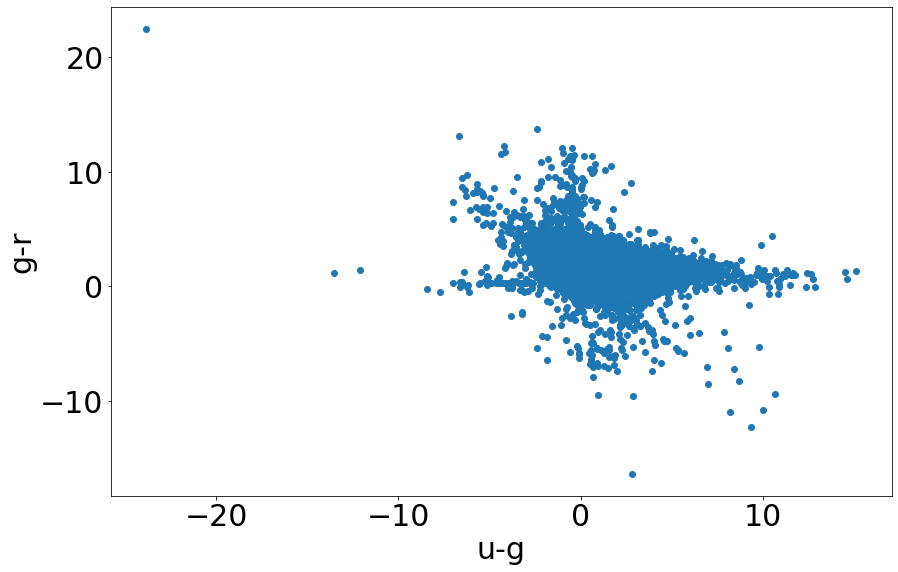

In [39]:
matplotlib.rcParams.update({'font.size': 30}) 
plt.figure(figsize=(14,9))
plt.scatter(df['u']-df['g'],df['g']-df['r'])
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.show()
plt.close()